In [57]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)


In [58]:
df = pd.read_csv('penguins.csv')
df.sample(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
81,42.9,17.6,196.0,4700.0,MALE
179,49.5,19.0,200.0,3800.0,MALE
138,37.0,16.5,185.0,3400.0,FEMALE
147,36.6,18.4,184.0,3475.0,FEMALE
264,50.5,15.9,222.0,5550.0,MALE


In [59]:
df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
10%,36.600000,14.300000,185.000000,3300.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
90%,50.800000,19.500000,221.000000,5400.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [61]:
df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [62]:
float64_cols = list(df.select_dtypes(include='float64'))
df[float64_cols] = df[float64_cols].astype('float32')

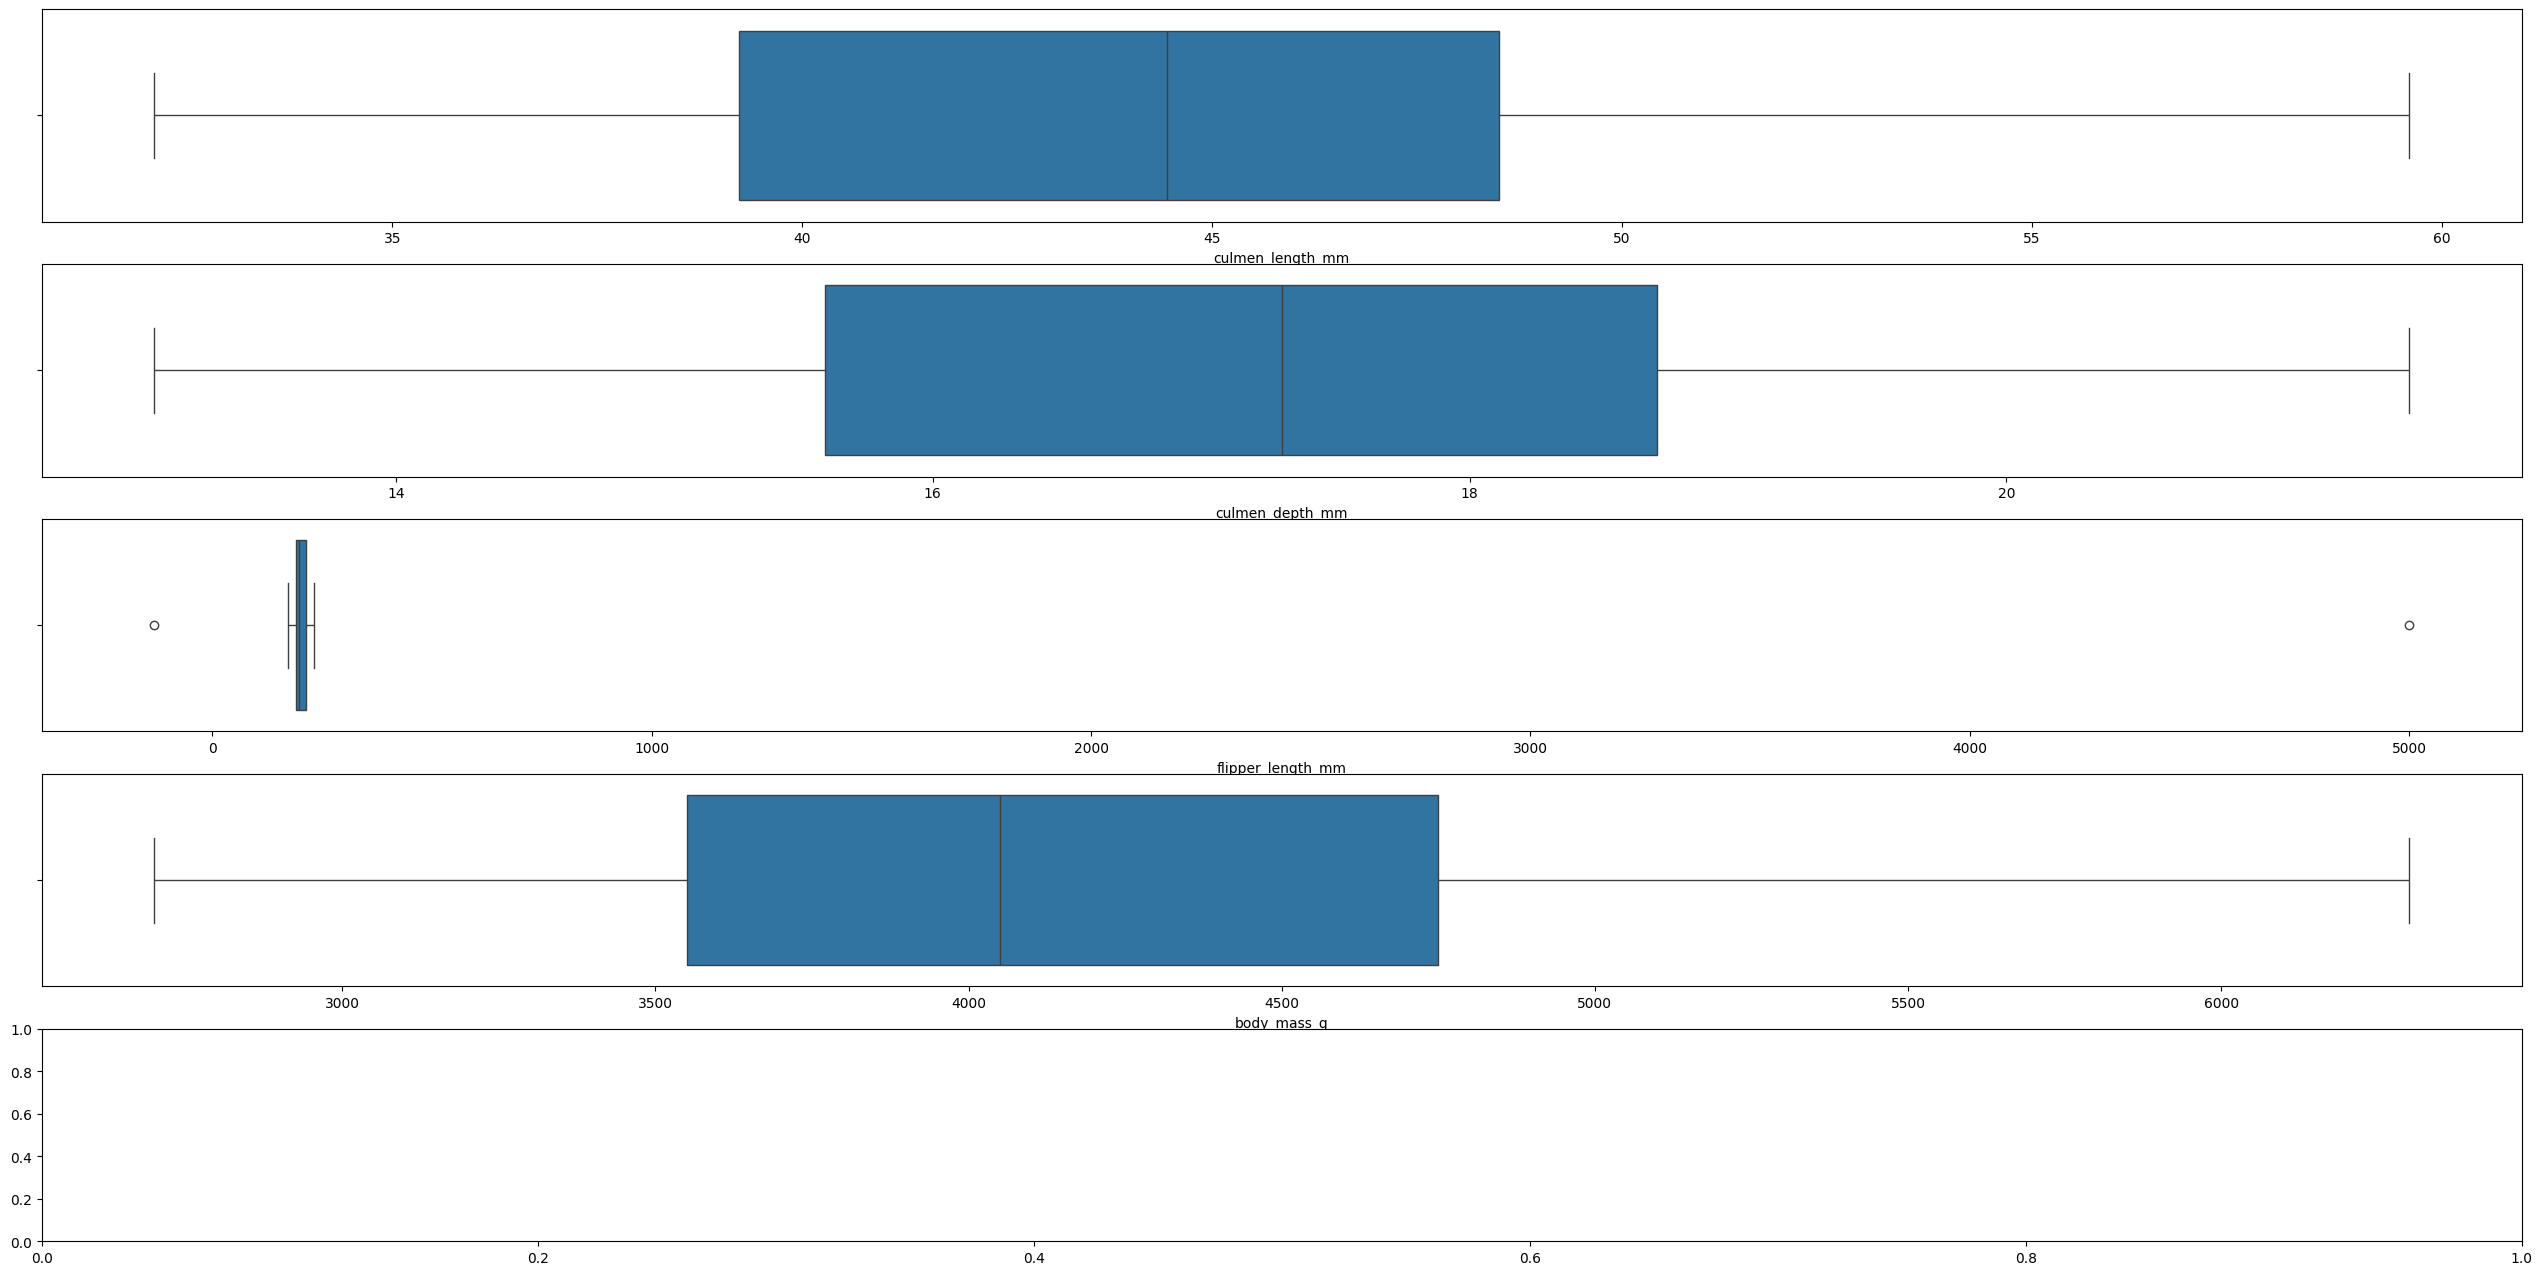

In [63]:
df_num = df.select_dtypes(include=np.number)

features = list(df_num.columns)
fig, axes = plt.subplots(5, len(features) // 5 + 1, figsize=(32, 16))

for idx, col in enumerate(features):
    sns.boxplot(data=df_num, x=col, ax=axes[idx % 5])

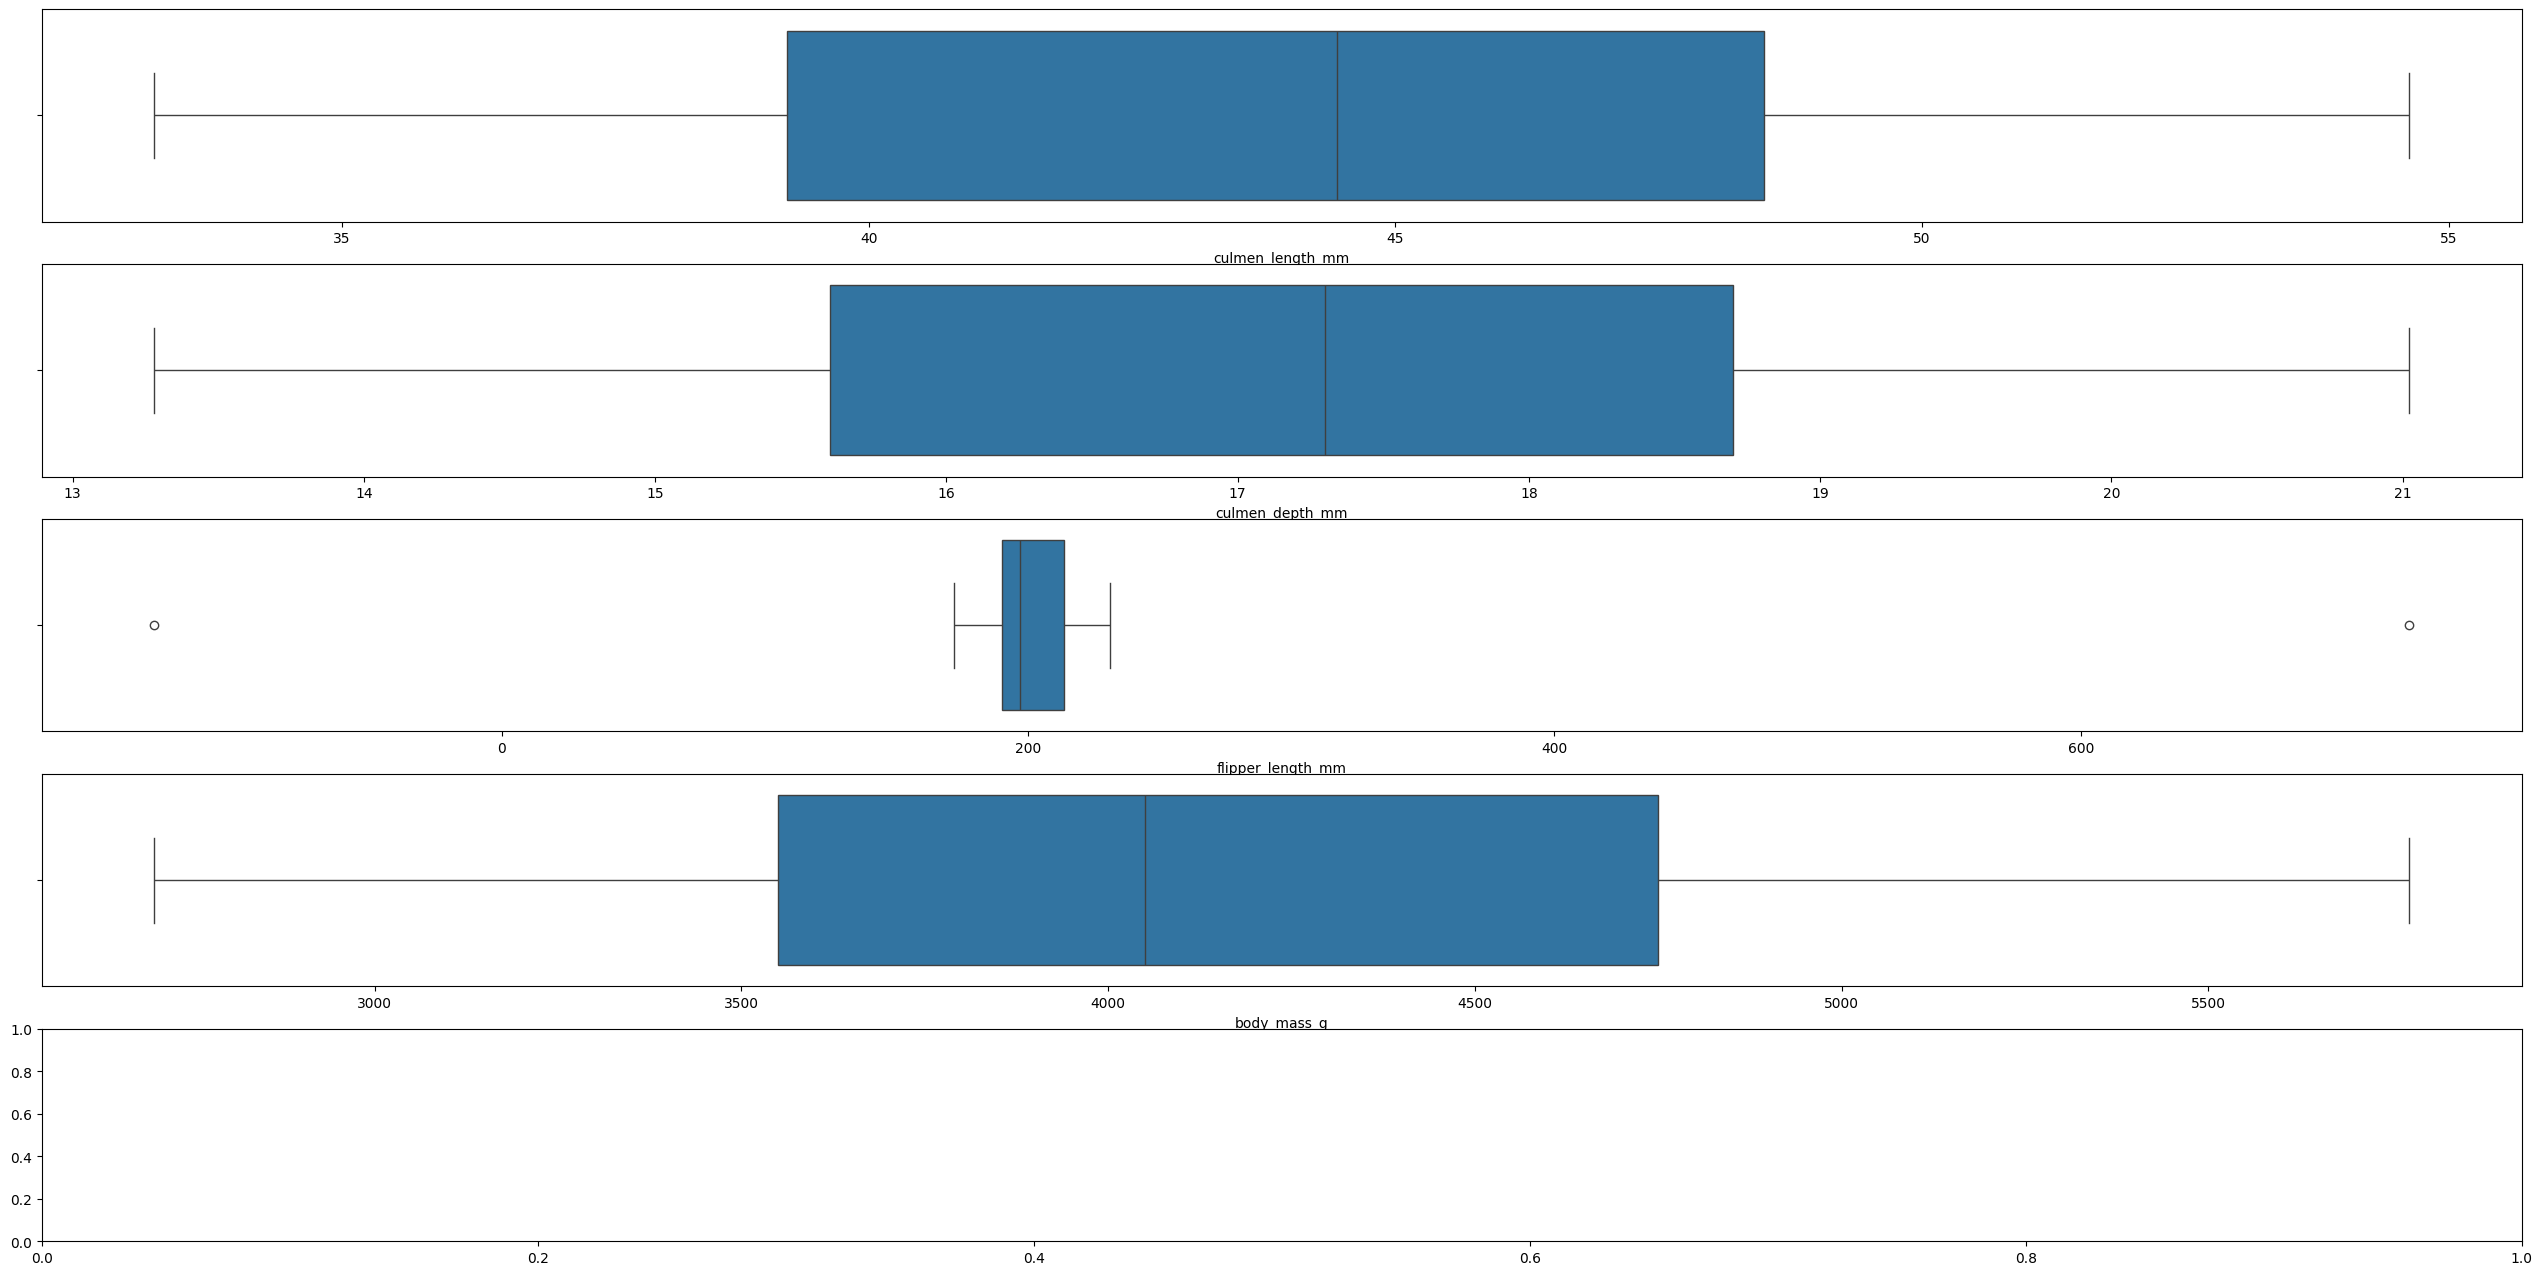

In [64]:
from scipy import stats

def replace_outliers(df: pd.DataFrame, threshold:float = 1.96):

    '''threshold = 1.96 for 95% of data 3 for 99.7%'''

    for col in df.select_dtypes(include=['number']).columns.tolist():
        z_scores = stats.zscore(df_num[col], nan_policy='omit')

        # Вычисляем границы интервала
        upper_bound = df[col].mean() + threshold * df[col].std()
        lower_bound = df[col].mean() - threshold * df[col].std()

        # Замена выбросов на границы интервала
        df.loc[z_scores > threshold, col] = upper_bound
        df.loc[z_scores < -threshold, col] = lower_bound


    return df.copy()


df = replace_outliers(df, 1.96)

df_num = df.select_dtypes(include=np.number)

features = list(df_num.columns)
fig, axes = plt.subplots(5, len(features) // 5 + 1, figsize=(32, 16))

for idx, col in enumerate(features):
    sns.boxplot(data=df_num, x=col, ax=axes[idx % 5])


In [65]:
for col in df.select_dtypes(include=['number']).columns.to_list():
    df[col] = df[col].fillna(df[col].median())

In [66]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [67]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=['number']).columns.to_list()
df[numeric_cols] = StandardScaler().fit_transform(df[numeric_cols])

In [83]:
print(df['sex'].value_counts())

df['sex'] = df['sex'].replace('.', 'MALE')

df = pd.get_dummies(df, columns=['sex'], drop_first=True)


sex
MALE      179
FEMALE    165
Name: count, dtype: int64


In [85]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,-0.895977,0.791661,-0.564941,-0.566187,True
1,-0.821247,0.127822,-0.427067,-0.502624,False
2,-0.671787,0.434209,-0.178893,-1.201815,False
3,0.103538,0.076757,-0.123743,-0.184810,True
4,-1.344357,1.098047,-0.234043,-0.947564,False
...,...,...,...,...,...
339,0.103538,0.076757,-0.123743,-0.184810,True
340,0.542577,-1.455178,0.372605,0.832194,False
341,1.215149,-0.740275,0.565629,1.976324,True
342,0.243657,-1.199855,0.289880,1.277134,False


In [88]:
df['sex_MALE'] = df['sex_MALE'].astype('int32')

In [89]:
numeric_cols = df.select_dtypes(include=['number']).columns.to_list()
df_num = df[numeric_cols]

<Axes: >

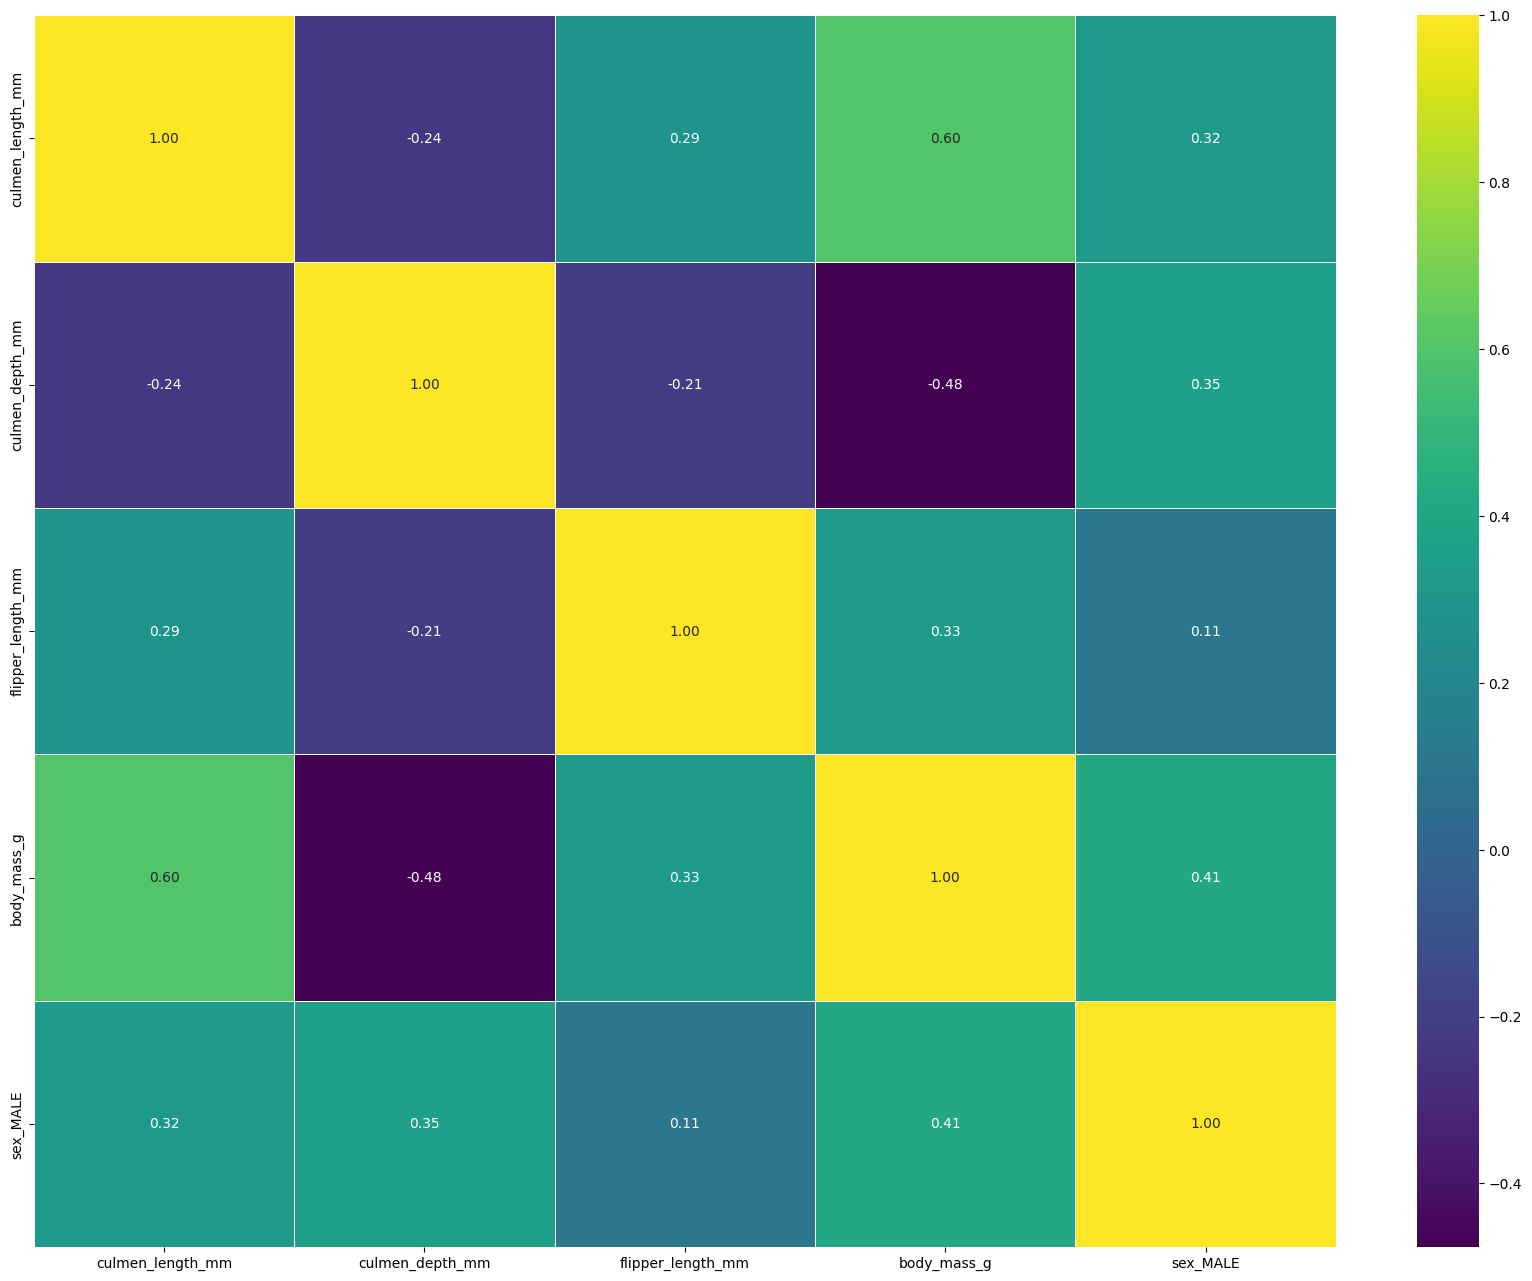

In [90]:
#Корреляция признаков между собой
plt.figure(figsize=(21, 16))
correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

        PC1       PC2       PC3       PC4       PC5
0 -1.346747  0.316020 -0.094315 -0.513910  0.335706
1 -1.007734 -0.522682  0.114727 -0.064433 -0.300877
2 -1.383238 -0.186029  0.458262  0.455608 -0.146369
3 -0.100017  0.240033 -0.159470  0.008270  0.450584
4 -1.896588  0.090774  0.581590 -0.246401 -0.481844


Text(0.5, 1.0, 'Зависимость обясненной дисперсии от количества компонент')

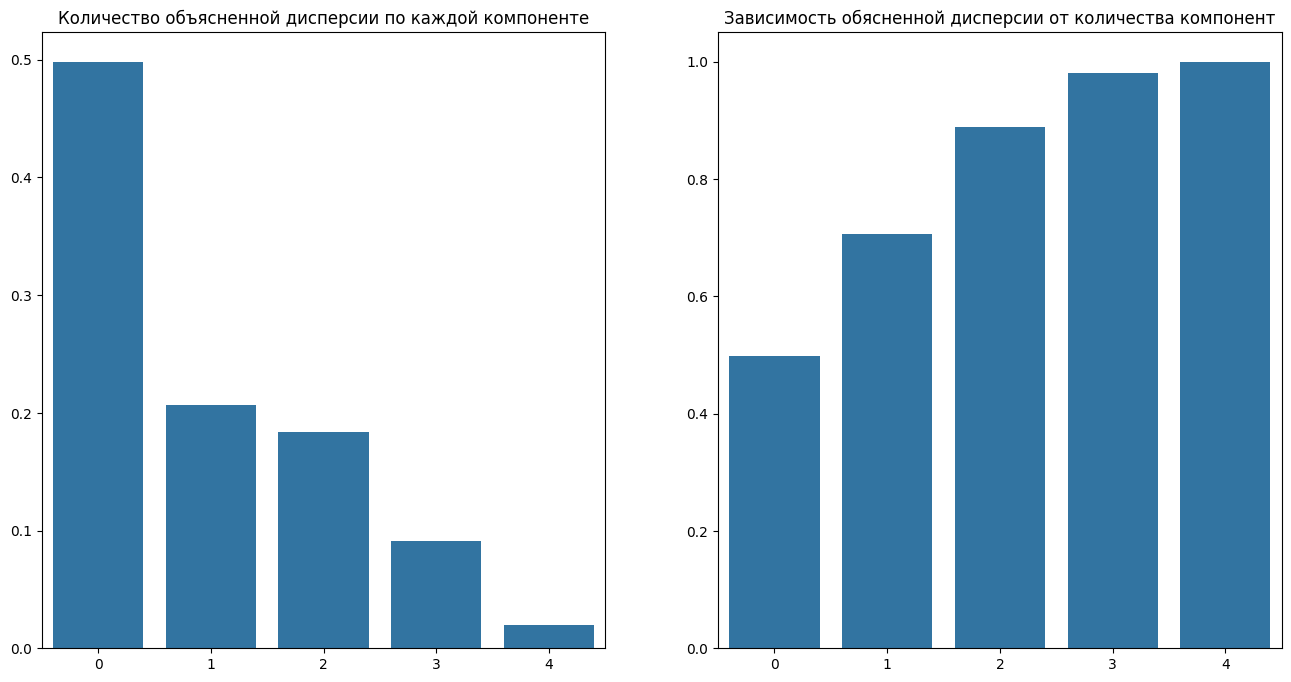

In [92]:
from sklearn.decomposition import PCA, KernelPCA

COMPONENTS = 5

pca = PCA(n_components=COMPONENTS)
p_components = pca.fit_transform(df_num)

df_pca = pd.DataFrame(data=p_components, columns=[f'PC{i}' for i in range(1, pca.components_.shape[0] + 1)])
print(df_pca.head())

#Объясненная дисперсия каждой компоненты
variance = pca.explained_variance_ratio_

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.barplot(data=variance, ax=axes[0]).set_title("Количество объясненной дисперсии по каждой компоненте")


cumulative_explained_variance = np.cumsum(variance)
sns.barplot(data=cumulative_explained_variance, ax=axes[1]).set_title("Зависимость обясненной дисперсии от количества компонент")

<Axes: xlabel='comps', ylabel='exp_var'>

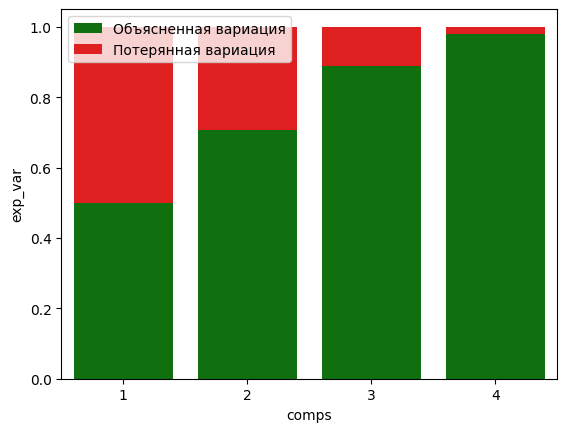

In [93]:
#Зависимость потери дисперсии от количества компонент

components = [i for i in range(1, 5)]
exp_var = [variance[: i].sum() for i in components]
lost = [1 - var for var in exp_var]

df_var = pd.DataFrame(zip(components, exp_var, lost), columns=['comps', 'exp_var', 'lost'])

sns.barplot(x='comps', y='exp_var', data=df_var, color='green', label='Объясненная вариация')
sns.barplot(x='comps', y='lost', data=df_var, bottom=df_var['exp_var'], color='red', label='Потерянная вариация')

При использовании 1 компоненты теряется 53% изначальной дисперсии признаков, для двух компонент уже 30% Таким образом оптимально количество компонент, которые бы смогли объяснить не менее 95% исходной дисперсии - 3

In [94]:
#Определим вклад каждого признака исходного датафрйма в создание компоненты
df_load = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, pca.components_.shape[0] + 1)], index=df_num.columns)

df_load

,PC1,PC2,PC3,PC4,PC5
culmen_length_mm,0.530021,0.388292,-0.364648,0.659802,-0.000578
culmen_depth_mm,-0.433803,0.814091,-0.010658,-0.136822,-0.360882
flipper_length_mm,0.401179,0.232114,0.885568,0.030557,0.003631
body_mass_g,0.602655,0.040638,-0.259623,-0.651845,-0.377955
sex_MALE,0.082190,0.361879,-0.123622,-0.346563,0.852585


<Axes: >

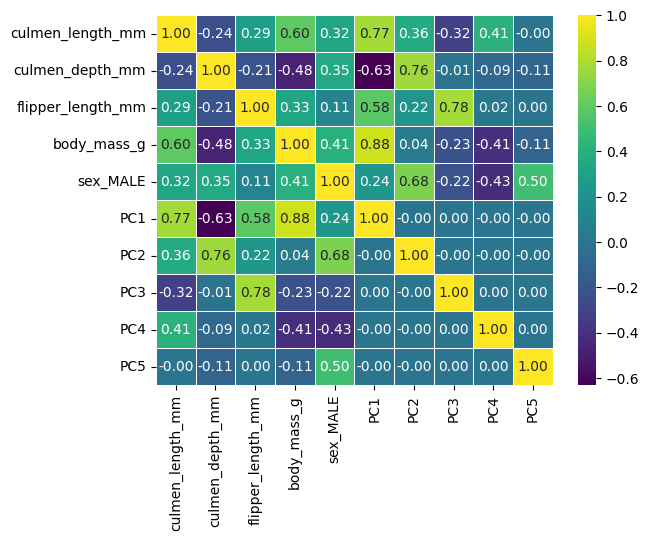

In [95]:
# Комбинируем исходные данные и компоненты PCA
df_combined = pd.concat([df_num, df_pca], axis=1)

correlation_matrix = df_combined.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

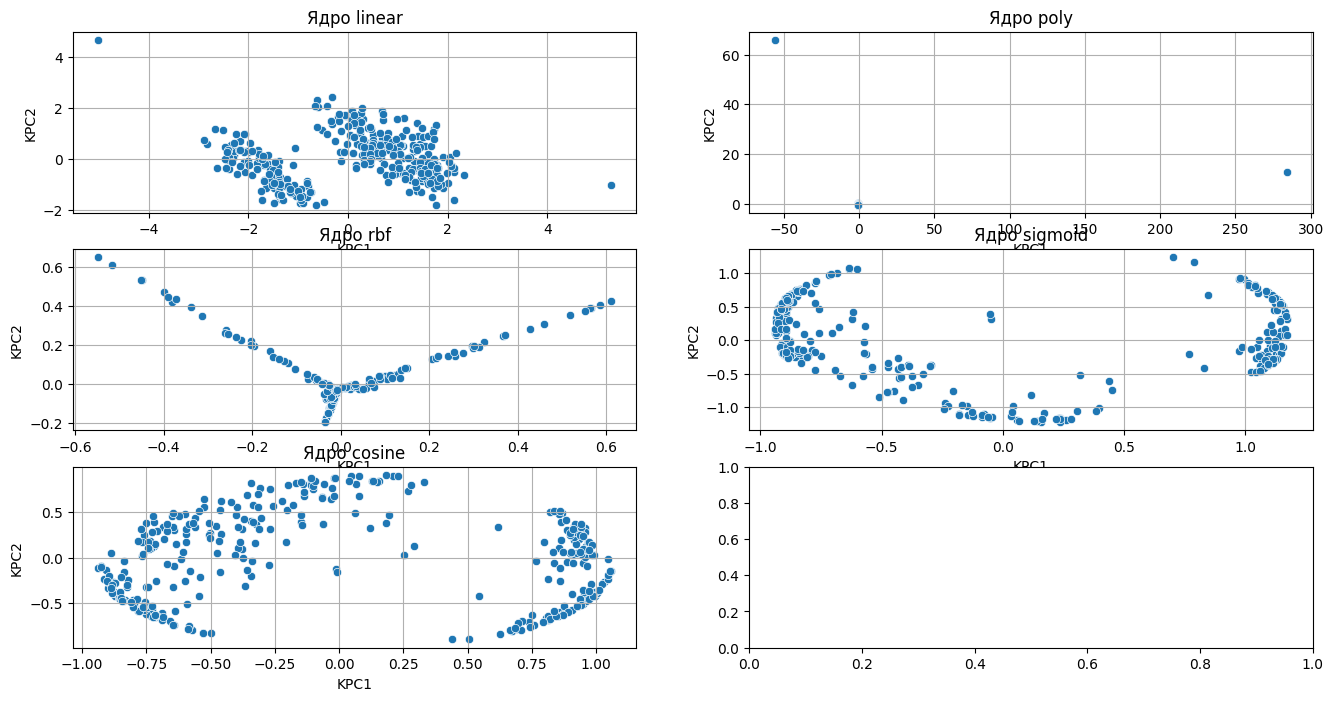

In [99]:
kernels = ('linear','poly','rbf','sigmoid','cosine')

kernel_params = (
    {},
    {'degree': 3, 'coef0': 1},
    {'gamma': 10},
    {'gamma': 10, 'coef0': 1},
    {}
)

fig, axes = plt.subplots(3, 2, figsize = (16, 8))


for ax, kernel, params in zip(axes.flatten(), kernels, kernel_params):
    kpca = KernelPCA(n_components=2, kernel=kernel, **params)
    principal_components = kpca.fit_transform(df_num)
    df_kpca = kpca.fit_transform(df_num)
    df_kpca = pd.DataFrame(data=principal_components, columns=['KPC1', 'KPC2'])


    sns.scatterplot(x='KPC1', y='KPC2', data=df_kpca, ax=ax)
    ax.set_title(f'Ядро {kernel}')
    ax.set_xlabel('KPC1')
    ax.set_ylabel('KPC2')
    ax.grid(True)


d:\projects\ml algorithms\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


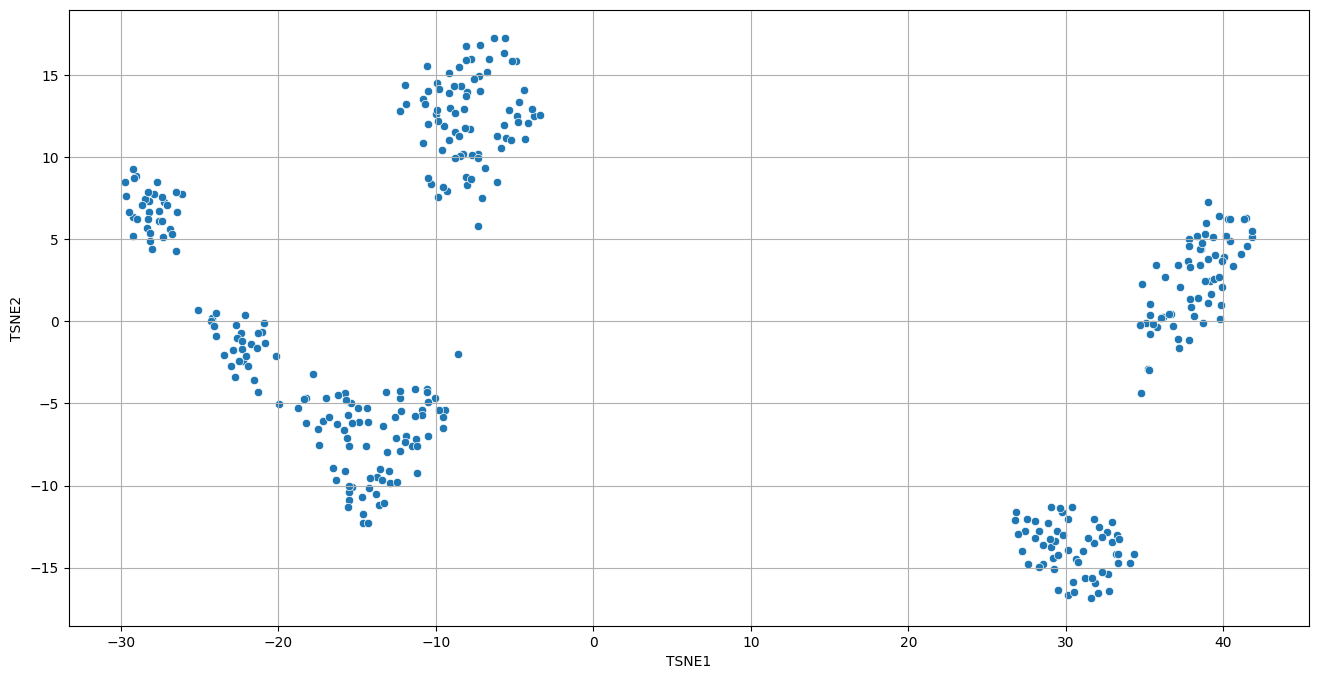

In [102]:
from sklearn.manifold import TSNE

plt.figure(figsize=(16, 8))

tsne_ = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=5000)
components = tsne_.fit_transform(df)

df_tsne = pd.DataFrame(data=components, columns=['TSNE1', 'TSNE2'])

sns.scatterplot(x='TSNE1', y='TSNE2', data=df_tsne)
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')

plt.grid(True)
plt.show()